In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from itertools import cycle
from math import pi
from pytimeparse.timeparse import timeparse
import ast

%config Completer.use_jedi = False


In [2]:
# read data

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/"

non_aug_filename = "baseline.csv"
join_all = "join-all-baseline.csv"
pipeline_small = "pipeline-best.csv"
pipeline_big = "pipeline-all.csv"

non_aug_filepath = os.path.join(folder_name, f"{dataset_path}{non_aug_filename}")
non_aug_df = pd.read_csv(non_aug_filepath, header=0, engine="python", encoding="utf8", quotechar='"', escapechar='\\')

join_all_filepath = os.path.join(folder_name, f"{dataset_path}{join_all}")
join_all_df = pd.read_csv(join_all_filepath, header=0, engine="python", encoding="utf8", quotechar='"', escapechar='\\')

pipeline_small_filepath = os.path.join(folder_name, f"{dataset_path}{pipeline_small}")
pipeline_small_df = pd.read_csv(pipeline_small_filepath, header=0, engine="python", encoding="utf8", quotechar='"', escapechar='\\')

pipeline_big_filepath = os.path.join(folder_name, f"{dataset_path}{pipeline_big}")
pipeline_big_df = pd.read_csv(pipeline_big_filepath, header=0, engine="python", encoding="utf8", quotechar='"', escapechar='\\')



In [3]:
# get original (base) table name from dataset name 

def shorten_dataset_name_join(data, join_df=False):
    index = -1 if join_df else 0
    split1 = data.split('/')[-1]
    split2 = split1.split('.')[0]
    split3 = split2.split('-')[index]
    return split3

non_aug_df['base_table'] = non_aug_df['dataset'].apply(lambda x: shorten_dataset_name_join(x))

join_all_df['base_table'] = join_all_df['dataset'].apply(lambda x: shorten_dataset_name_join(x, True))

# highest ranked joined path for each feat sel method, eatch algorithm and each dataset
pipeline_small_df['base_table'] = pipeline_small_df['dataset'].apply(lambda x: shorten_dataset_name_join(x))

# all the paths ranked in descending order for each feat sel method, eatch algorithm and each dataset 
pipeline_big_df['base_table'] = pipeline_big_df['dataset'].apply(lambda x: shorten_dataset_name_join(x))



In [4]:
# get global variables 

algs = non_aug_df['algorithm'].unique()
print(algs)

tables = non_aug_df['base_table'].unique()
print(tables)

sel_methods = pipeline_small_df['feat_sel'].unique()
print(sel_methods)


['CART' 'ID3' 'XGBoost']
['football' 'kidney_disease' 'steel_plate_fault' 'titanic']
['symmetrical uncertainty' 'information-gain' 'gini-index'
 'spearman-correlation' 'reliefF']


In [366]:
# display data

display(non_aug_df.head())

display(join_all_df.head())

display(pipeline_small_df.head())

display(pipeline_big_df.head())


,dataset,accuracy,algorithm,criterion,max_depth,base_table
0,decision-trees-split/football/football.csv,40.08,CART,entropy,1.0,football
1,decision-trees-split/football/football.csv,45.99,ID3,NaN,NaN,football
2,decision-trees-split/football/football.csv,54.43,XGBoost,NaN,4.0,football
3,decision-trees-split/kidney-disease/kidney_dis...,71.25,CART,gini,3.0,kidney_disease
4,decision-trees-split/kidney-disease/kidney_dis...,50.00,ID3,NaN,NaN,kidney_disease


,dataset,accuracy,algorithm,runtime,criterion,max_depth,base_table
0,joined-df/join-all-football.csv,100.00,CART,0 days 00:00:05.869166,entropy,39.0,football
1,joined-df/join-all-football.csv,73.44,ID3,0 days 00:01:34.681043,NaN,NaN,football
2,joined-df/join-all-football.csv,100.00,XGBoost,0 days 00:01:01.941467,NaN,2.0,football
3,joined-df/join-all-kidney_disease.csv,97.50,CART,0 days 00:00:01.238467,entropy,12.0,kidney_disease
4,joined-df/join-all-kidney_disease.csv,57.50,ID3,0 days 00:00:06.377977,NaN,NaN,kidney_disease


,dataset,accuracy,algorithm,score,feat_sel,runtime,path,path_ids,criterion,max_depth,base_table
0,football-weak_team-weak_building.csv,71.37,CART,0.836633,symmetrical uncertainty,0 days 00:00:02.257873,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id', 'id', 'wt_id']",gini,2.0,football
1,football-weak_team-weak_building.csv,56.02,ID3,0.836633,symmetrical uncertainty,0 days 00:00:16.402762,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id', 'id', 'wt_id']",NaN,NaN,football
2,football-weak_team-weak_building.csv,69.71,XGBoost,0.836633,symmetrical uncertainty,0 days 00:00:21.199858,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id', 'id', 'wt_id']",NaN,1.0,football
3,football-strong_team.csv,81.43,CART,0.294528,information-gain,0 days 00:00:00.970012,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id']",entropy,3.0,football
4,football-strong_team.csv,60.76,ID3,0.294528,information-gain,0 days 00:00:09.031012,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id']",NaN,NaN,football


,dataset,accuracy,algorithm,score,feat_sel,runtime,path,path_ids,criterion,max_depth,base_table
0,football-weak_team-weak_strategy-weak_change_c...,68.85,CART,0.723275,symmetrical uncertainty,0 days 00:00:02.655308,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id', 'id', 'wt_id', 'id', 'ws_id']",entropy,1.0,football
1,football-strong_team-strong_strategy-strong_ch...,79.35,CART,0.561665,symmetrical uncertainty,0 days 00:00:01.571580,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id', 'id', 'st_id', 'id', 'ss_id']",entropy,3.0,football
2,football-strong_team-strong_building.csv,77.17,CART,0.434164,symmetrical uncertainty,0 days 00:00:01.026905,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id', 'id', 'st_id']",gini,7.0,football
3,football-strong_team-strong_strategy.csv,79.35,CART,0.434164,symmetrical uncertainty,0 days 00:00:01.230921,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id', 'id', 'st_id']",entropy,3.0,football
4,football-strong_team.csv,81.43,CART,0.430252,symmetrical uncertainty,0 days 00:00:00.959562,['other-data/decision-trees-split/football/foo...,"['id', 'ft_id']",entropy,3.0,football


,base_table,algorithm,feat_sel,path_length,accuracy
0,football,CART,gini-index,2,71.37
1,football,CART,information-gain,1,81.43
2,football,CART,reliefF,1,81.43
3,football,CART,spearman-correlation,3,68.85
4,football,CART,symmetrical uncertainty,2,71.37


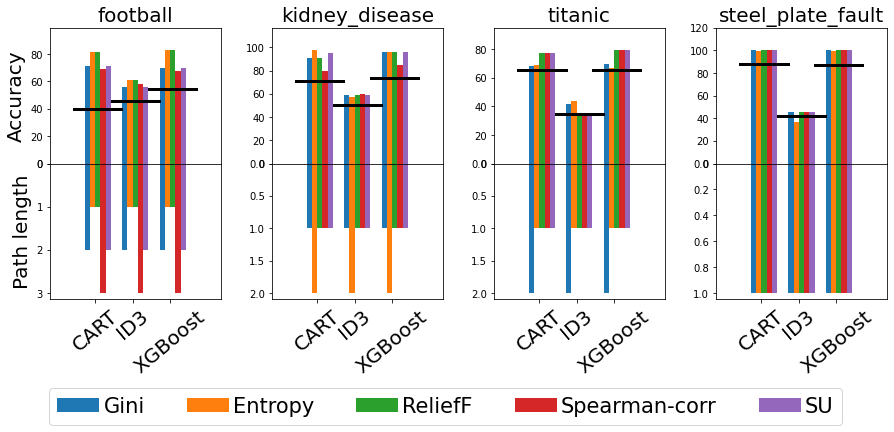

In [5]:
# Accuracy of BestRank and Non-Aug per feature selection method, per algorithm
# Join path length 

feat_sel = pipeline_small_df.copy()

feat_sel['path_length'] = feat_sel['path'].apply(ast.literal_eval).apply(lambda x: len(x)-1)

feat_sel_df = feat_sel.groupby(['base_table', 'algorithm', 'feat_sel', 'path_length'])['accuracy'].max().reset_index()
display(feat_sel_df.head())


fig, axs = plt.subplots(2, 4, figsize=(15, 5), sharex=True)
fig.subplots_adjust(wspace=0.3, hspace=0)

feat_sel_map = {
    'Non-aug': 'Non-aug',
    'gini-index': 'Gini',
    'information-gain': 'Entropy',
    'reliefF': 'ReliefF',
    'spearman-correlation': 'Spearman-corr',
    'symmetrical uncertainty': 'SU'
}

def plot_non_aug_best_path_feat_sel(feat_sel_df, non_aug_df, base_table_name, axis1, axis2):
    width = 0.7
    
    fsd = feat_sel_df[feat_sel_df['base_table']==base_table_name]
    nad = non_aug_df[non_aug_df['base_table']==base_table_name]

    x = np.arange(len(fsd['algorithm'].unique()))    
    
    n = len(fsd['feat_sel'].unique())
    
    cart = [((i+1) * width)/n for i in np.arange(-n/2, n + n/2)]
    id3 = [1 + ((i+1) * width)/n for i in np.arange(-n/2, n + n/2)]
    xgb = [2 + ((i+1) * width)/n for i in np.arange(-n/2, n + n/2)]
        
    for i, name in enumerate(fsd['feat_sel'].unique()):
        d2 = fsd[fsd['feat_sel'] == name]
        xv = x+((i+1) * width)/n
        axis1.bar(x=xv, height=d2['accuracy'], width=width/n, label=name)
        axis2.bar(x=xv, height=d2['path_length'], width=width/n, label=name)
        axis1.set_title(f"{base_table_name}", fontsize=20)
    
    axis1.plot(cart, np.full((len(cart)), nad[nad['algorithm']=='CART']['accuracy']), linewidth=3, color='black', label='Non-aug')
    axis1.plot(id3, np.full((len(cart)), nad[nad['algorithm']=='ID3']['accuracy']), linewidth=3, color='black')
    axis1.plot(xgb, np.full((len(cart)), nad[nad['algorithm']=='XGBoost']['accuracy']), linewidth=3, color='black')

    axis2.set_xticks(x+0.35)
    axis2.set_xticklabels(d2['algorithm'].unique(), rotation=40, fontsize=20)
    axis2.set_ylim(axis2.get_ylim()[::-1])

tables_order = ['football', 'kidney_disease','titanic', 'steel_plate_fault']
for i, name in enumerate(tables_order):
    plot_non_aug_best_path_feat_sel(feat_sel_df, non_aug_df, name, axs[0][i], axs[1][i])
    axs[0][i].margins(0.2)
    axs[1][i].margins(0.2)
    
    
axs[0][0].set_ylabel('Accuracy', fontsize=20, )
axs[1][0].set_ylabel('Path length', fontsize=20)


hh, ll = plt.gca().get_legend_handles_labels()
ll = list(map(lambda x: feat_sel_map[x], ll))
legend = plt.legend(hh, ll, bbox_to_anchor=(0.8, -1), loc=4, ncol=6, handletextpad=0.2, fontsize=21)

plt.savefig('plots/feat-sel-best-non.pdf', dpi=300, bbox_inches="tight")


,base_table,algorithm,accuracy,label
0,football,CART,81.43,BestRank
1,football,ID3,60.76,BestRank
2,football,XGBoost,82.70,BestRank
3,kidney_disease,CART,97.50,BestRank
4,kidney_disease,ID3,60.00,BestRank


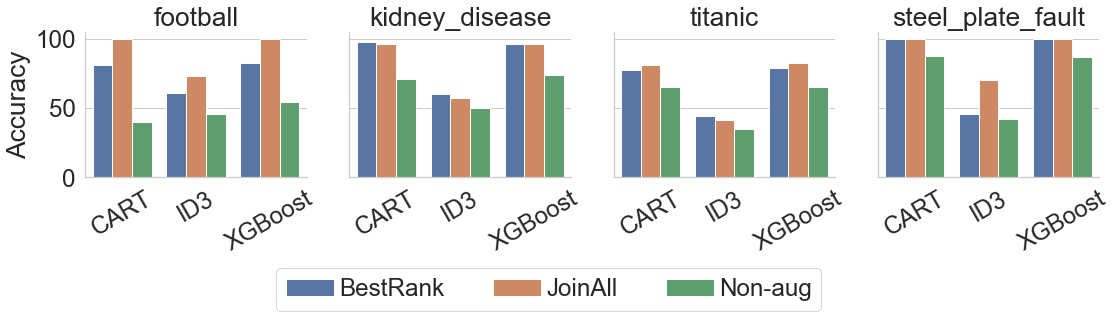

In [6]:
# Accuracy of BestRank, JoinAll and Non-Aug

max_acc_df = pipeline_small_df.groupby(['base_table', 'algorithm'])['accuracy'].max().to_frame(name='accuracy').reset_index()
max_acc_df['label'] = 'BestRank'

non_aug_plot = non_aug_df.drop(columns=['dataset', 'criterion', 'max_depth'])
non_aug_plot['label'] = 'Non-aug'

join_all_plot = join_all_df.drop(columns=['dataset', 'criterion', 'max_depth', 'runtime'])
join_all_plot['label'] = 'JoinAll'

concat_df = pd.concat([max_acc_df, non_aug_plot, join_all_plot])

display(concat_df.head())

label_order = {'non-aug': 0, 'best path': 1, 'join-all': 2}

concat_df.sort_values(by=['algorithm'], ascending=True, inplace=True)
concat_df.sort_values(by=['label'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="label", col="base_table", data=concat_df, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/non-aug-best-path-join-all-accuracy.pdf', dpi=300, bbox_inches="tight")



,accuracy,algorithm,score,feat_sel,max_depth,base_table,seconds
3,81.43,CART,0.294528,information-gain,3.0,football,1.023950
24,80.00,CART,0.654151,spearman-correlation,5.0,kidney_disease,0.438227
39,100.00,CART,0.713139,spearman-correlation,7.0,steel_plate_fault,1.506733
45,77.65,CART,0.621203,symmetrical uncertainty,2.0,titanic,0.622389
4,60.76,ID3,0.294528,information-gain,NaN,football,7.100381


,accuracy,algorithm,max_depth,base_table,seconds
0,100.00,CART,13.0,football,6.067329
3,96.25,CART,23.0,kidney_disease,1.015767
6,100.00,CART,11.0,steel_plate_fault,5.718045
9,81.22,CART,1.0,titanic,0.675928
1,73.44,ID3,NaN,football,70.237812


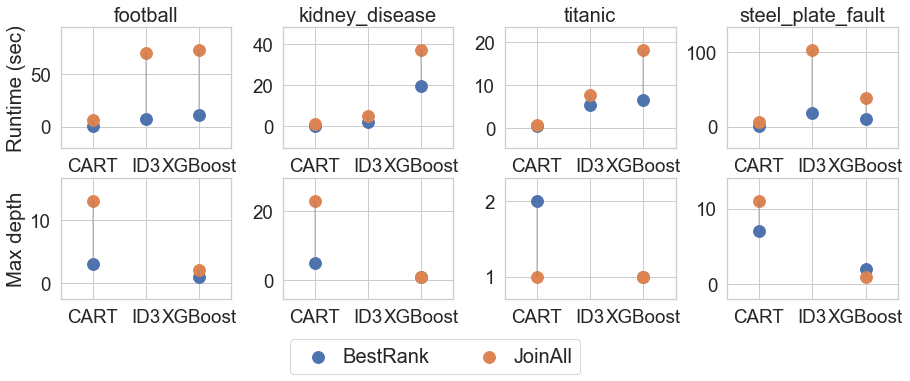

In [7]:
# Runtime BestRank and JoinAll per algorithm 
# Tree depth BestRank and JoinAll per algorithm


pipeline_small_df['seconds'] = pipeline_small_df['runtime'].apply(lambda x: timeparse(x))
df = pipeline_small_df.drop(columns=['dataset', 'path', 'path_ids', 'criterion', 'runtime'])

df['help'] = df.groupby(['base_table', 'algorithm', 'seconds'])['accuracy'].transform('max')
df.drop(df[df['accuracy'] != df['help']].index, inplace=True)
df.drop(columns=['help'], inplace=True)

df['help'] = df.groupby(['base_table', 'algorithm'])['seconds'].transform('min')
df.drop(df[df['seconds'] != df['help']].index, inplace=True)
df.drop(columns=['help'], inplace=True)

best_ranked_acc_time = df.copy()
best_ranked_acc_time.sort_values(by=['algorithm'], inplace=True)

display(best_ranked_acc_time.head())



join_all_df['seconds'] = join_all_df['runtime'].apply(lambda x: timeparse(x))
df = join_all_df.drop(columns=['dataset', 'runtime', 'criterion'])

join_all_acc_time = df.copy()
join_all_acc_time.sort_values(by=['algorithm'], inplace=True)

display(join_all_acc_time.head())



sns.set(font_scale=1.7, style="whitegrid")
colors = sns.color_palette("Set2")


f, axs = plt.subplots(2, 4, figsize=(15, 5))
f.subplots_adjust(wspace=0.3, hspace=0.25)



def plot_runtime(best_path_df, join_all, base_table_name, axis):
    df2 = best_path_df[best_path_df['base_table']==base_table_name]
    df3 = join_all[join_all['base_table']==base_table_name]

    axis.scatter(x=df2['algorithm'], y=df2['seconds'], label='BestRank', s=140)
    axis.scatter(x=df3['algorithm'], y=df3['seconds'], label='JoinAll', s=140)
    axis.vlines(x=algs, ymin=df2['seconds'], ymax=df3['seconds'], color='grey', alpha=0.4)
    axis.set_title(f"{base_table_name}",fontsize=20)
    
    
def plot_depth(best_path_df, join_all, base_table_name, axis):
    df2 = best_path_df[best_path_df['base_table']==base_table_name]
    df3 = join_all[join_all['base_table']==base_table_name]

    axis.scatter(x=df2['algorithm'], y=df2['max_depth'], label='BestRank', s=140)
    axis.scatter(x=df3['algorithm'], y=df3['max_depth'], label='JoinAll', s=140)
    axis.vlines(x=algs, ymin=df2['max_depth'], ymax=df3['max_depth'], color='grey', alpha=0.4)

tables_order = ['football', 'kidney_disease', 'titanic', 'steel_plate_fault']
for i, name in enumerate(tables_order):
    plot_runtime(best_ranked_acc_time, join_all_acc_time, name, axs[0][i])
    axs[0][i].margins(0.3)
    plot_depth(best_ranked_acc_time, join_all_acc_time, name, axs[1][i])
    axs[1][i].margins(0.3)
    

axs[0][0].set_ylabel('Runtime (sec)')
axs[1][0].set_ylabel('Max depth')
hh, ll = plt.gca().get_legend_handles_labels()
legend = plt.legend(hh, ll, bbox_to_anchor=(-0.8, -0.7), loc=4, ncol=3, handletextpad=0.2, fontsize=20)

plt.savefig('plots/depth-runtime.pdf', dpi=300, bbox_inches="tight")
    